# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd
import matplotlib.cm as cm
import matplotlib.image as mpimg
from sklearn import preprocessing
import cv2
from sklearn.utils import shuffle
import random
from tensorflow.contrib.layers import flatten
import os
import csv
from PIL import Image

%matplotlib inline

training_file = "data/train.p"
validation_file = "data/valid.p"
testing_file = "data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("Image Shape:    {}".format(X_train[0].shape))
print("Training Set:   {}".format(len(training_file)))
print("Validation Set: {}".format(len(validation_file)))
print("Test Set:       {}".format(len(testing_file)))

Image Shape:    (32, 32, 3)
Training Set:   12
Validation Set: 12
Test Set:       11


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

In [2]:
# Number of training examples
n_train = len(X_train)
# Number of validation examples
n_validation = len(X_valid)
# Number of testing examples.
n_test = len(X_test)
# Shape of first image
image_shape = X_train[0].shape
# Number of unique classes/labels in the dataset
n_classes = len(np.unique(y_train))

# Printing out the results
print("Number of training examples = ", n_train)
print("Number of testing examples = ", n_test)
print("Number of testing examples = ", n_validation)
print("Image data shape = ", image_shape)
print("Number of classes = ", n_classes)

Number of training examples =  34799
Number of testing examples =  12630
Number of testing examples =  4410
Image data shape =  (32, 32, 3)
Number of classes =  43


### Include an exploratory visualization of the dataset

31


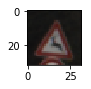

In [3]:
# Credit: Used the LeNet Lab code for this cell
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Preprocess the data here. It is required to normalize the data, converting to grayscale, etc.

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
# Shuffle the training data
X_train, y_train = shuffle(X_train, y_train)

# Place holder
#keep_prob = tf.placeholder(tf.float32)

# The EPOCH and BATCH_SIZE values affect the training speed and model accuracy.
EPOCHS = 100
BATCH_SIZE = 128
DROPOUT = 0.5
rate = 0.001

def preprocess(images, axis=3):
    # Greyscale
    grayscale = np.sum(images/3, axis = axis, keepdims = True)
    # Normalize
    normalize = (grayscale - 128) / 128
    return normalize

X_train = preprocess(X_train)
X_valid = preprocess(X_valid)
X_test  = preprocess(X_test)

### Model Architecture

In [8]:
# Credit: Used LeNet Lab Solution

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation and dropout.
    fc1    = tf.nn.relu(fc1)
    #fc1  = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation and dropout
    fc2    = tf.nn.relu(fc2)
    #fc2    = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [9]:
# x is a placeholder for a batch of input images
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
# y is a placeholder for a batch of output labels.
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

### Training Pipeline

In [10]:
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation

In [11]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train The Model

In [12]:
# Now that everything else is set up we can build a function to train and
# validate our model
# First we create the TF session and initialize the variables
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    # We train over whatever number of EPOCHs has been set
    for i in range(EPOCHS):
        # At the beginning of each EPOCH we shuffle our training data to
        # ensure that our training isn't bias by the order of the images
        X_train, y_train = shuffle(X_train, y_train)
        # Then we break our training data into batches and train the model on each batch
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        
        # At the end of each EPOCH we evaluate the model on our validation data
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    # Once we have completely trained the model we save it so that
    # we can load it up later and modify it, or evaluate it on our test dataset
    save_file = './lenet'
    #save_file = './lenetmodel\model.ckpt'
    saver.save(sess, save_file)
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.733

EPOCH 2 ...
Validation Accuracy = 0.837

EPOCH 3 ...
Validation Accuracy = 0.864

EPOCH 4 ...
Validation Accuracy = 0.901

EPOCH 5 ...
Validation Accuracy = 0.894

EPOCH 6 ...
Validation Accuracy = 0.880

EPOCH 7 ...
Validation Accuracy = 0.913

EPOCH 8 ...
Validation Accuracy = 0.917

EPOCH 9 ...
Validation Accuracy = 0.904

EPOCH 10 ...
Validation Accuracy = 0.904

EPOCH 11 ...
Validation Accuracy = 0.923

EPOCH 12 ...
Validation Accuracy = 0.906

EPOCH 13 ...
Validation Accuracy = 0.900

EPOCH 14 ...
Validation Accuracy = 0.917

EPOCH 15 ...
Validation Accuracy = 0.917

EPOCH 16 ...
Validation Accuracy = 0.916

EPOCH 17 ...
Validation Accuracy = 0.924

EPOCH 18 ...
Validation Accuracy = 0.908

EPOCH 19 ...
Validation Accuracy = 0.901

EPOCH 20 ...
Validation Accuracy = 0.909

EPOCH 21 ...
Validation Accuracy = 0.913

EPOCH 22 ...
Validation Accuracy = 0.931

EPOCH 23 ...
Validation Accuracy = 0.914

EPOCH 24 ...
Validation Accura

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

The following are all of the sign names in he signnames.csv file
    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vehicles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                          

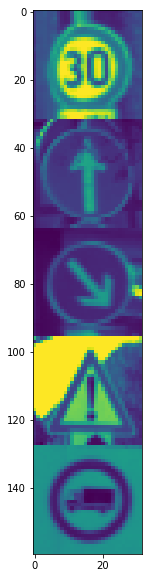

In [13]:
# Load sign names
sign_names = pd.read_csv('signnames.csv')
print("The following are all of the sign names in he signnames.csv file")
print("================================================================")
print(sign_names)

# Images found here on web: https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
imgdir = 'test'
test_list_images = []
for image in os.listdir('test'):
    if image.endswith('.png'):
        read_images = mpimg.imread(os.path.join(imgdir, image))
        normalize_img = preprocess(read_images, axis=2)
        resize_img = cv2.resize(normalize_img, (32,32), interpolation=cv2.INTER_AREA)
        test_list_images.append(resize_img)
        
plt.figure(figsize = (10,10))
show_images = np.concatenate(test_list_images[0:6])
plt.imshow(show_images)

### Predict the Sign Type for Each Image

In [14]:
# Preprocessing my images here
resize_img = np.array(resize_img) 
prediction_images = np.array(resize_img).reshape(1, 32, 32, 1)
preprocssed_images = preprocess(resize_img, axis = 0)
print("The shape of my resized image:", preprocssed_images.shape)

# Defining the corresponding labels
traffic_sign_labels = np.array([38,35,10,13,1])

# Using evaluate function to predict
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./lenet")
    predict_accuracy = evaluate(prediction_images, traffic_sign_labels)
    print("The accuracy is {:.3f}".format(predict_accuracy))

The shape of my resized image: (1, 32)
INFO:tensorflow:Restoring parameters from ./lenet
The accuracy is 0.000


### Analyze Performance

In [15]:
# Calculate the accuracy for these 5 new images. 
for img in test_list_images:
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        saver.restore(sess, "./lenet")
        preprocssed_images = preprocess(resize_img, axis = 0)
        my_accuracy = evaluate(prediction_images, traffic_sign_labels)
        print('Image {}'.format(resize_img + 1))
        print("Image Accuracy = {:.3f}".format(my_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Image [[ 0.00439465  0.00434411  0.00437641 ...,  0.0036968   0.00373751
   0.00340283]
 [ 0.00442886  0.00439823  0.00442278 ...,  0.00447041  0.00445157
   0.00440097]
 [ 0.00442016  0.00441557  0.0043605  ...,  0.00452894  0.00453395
   0.00449461]
 ..., 
 [ 0.00430417  0.00424671  0.00424278 ...,  0.00429988  0.00430501
   0.00436616]
 [ 0.00427109  0.00424492  0.00421089 ...,  0.00425696  0.00428104
   0.00430167]
 [ 0.00422466  0.00419396  0.00427067 ...,  0.00429058  0.00431627
   0.00433254]]
Image Accuracy = 0.000
INFO:tensorflow:Restoring parameters from ./lenet
Image [[ 0.00439465  0.00434411  0.00437641 ...,  0.0036968   0.00373751
   0.00340283]
 [ 0.00442886  0.00439823  0.00442278 ...,  0.00447041  0.00445157
   0.00440097]
 [ 0.00442016  0.00441557  0.0043605  ...,  0.00452894  0.00453395
   0.00449461]
 ..., 
 [ 0.00430417  0.00424671  0.00424278 ...,  0.00429988  0.00430501
   0.00436616]
 [ 0.00427109  0.00424492  0.0

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
Image Accuracy = 0.729
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
Image Accuracy = 0.729
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
Image Accuracy = 0.729
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
Image Accuracy = 0.729
INFO:tensorflow:Restoring parameters from ./lenet
INFO:tensorflow:Restoring parameters from ./lenet
Image Accuracy = 0.729


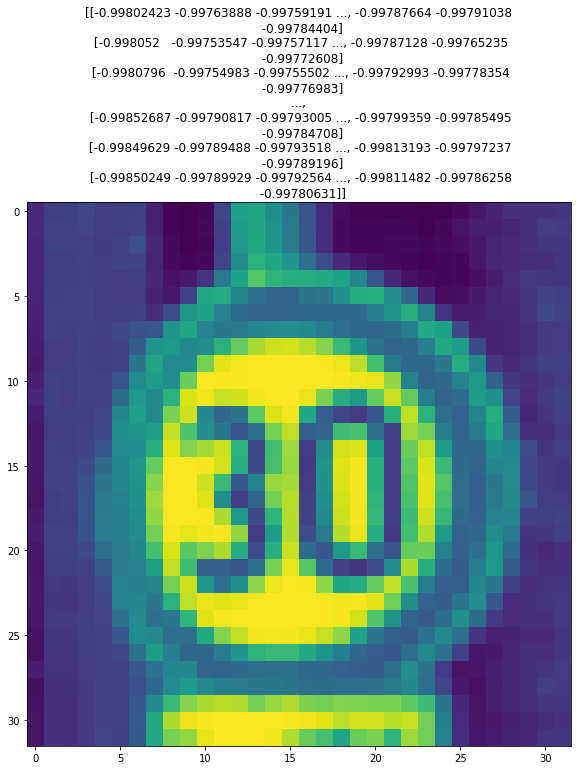

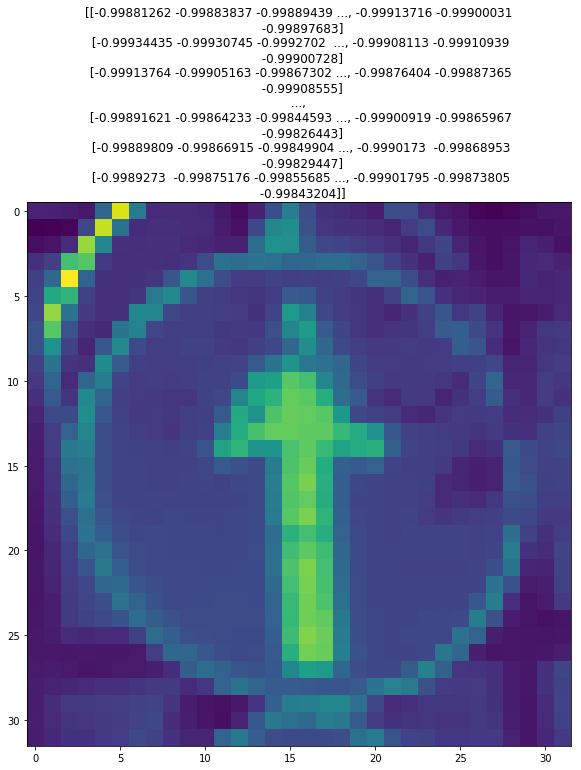

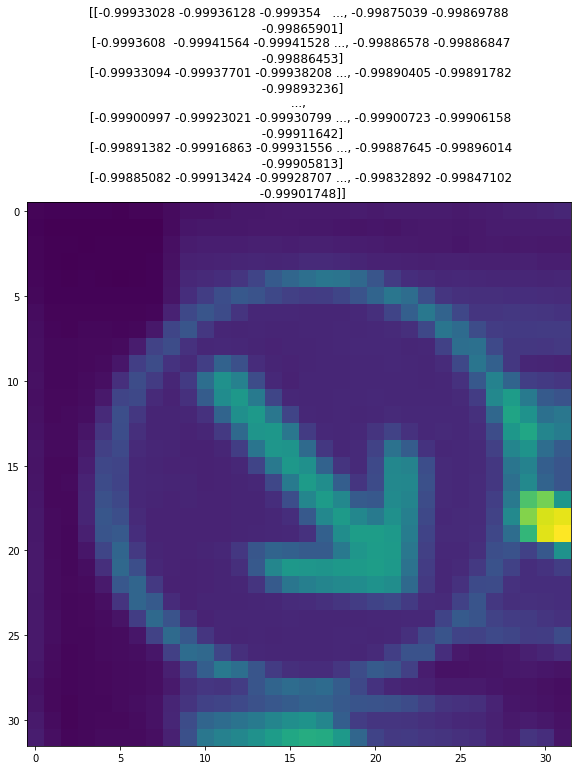

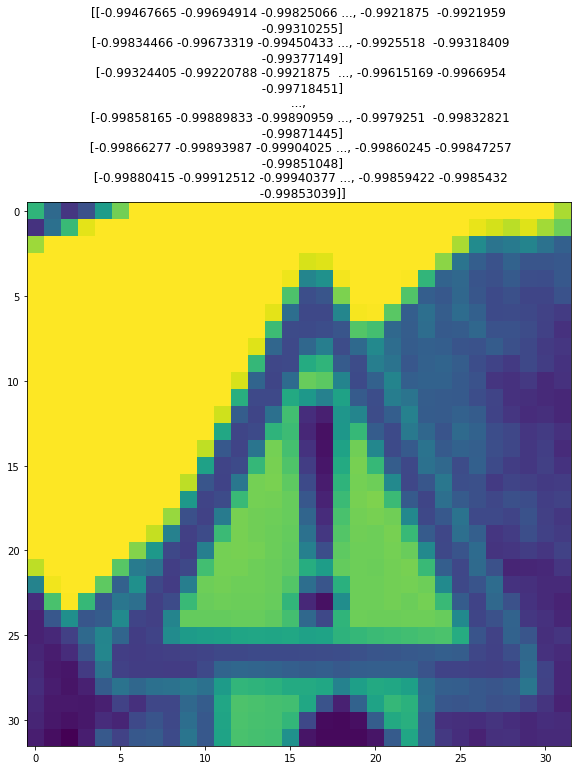

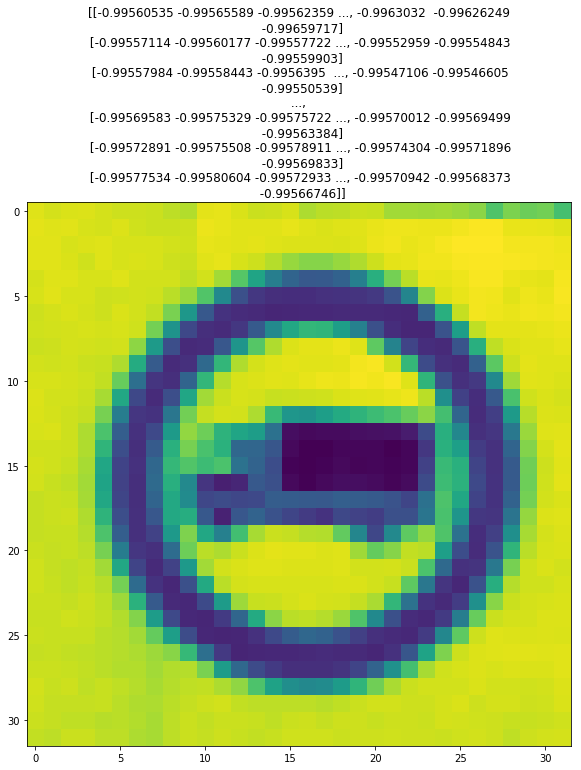

In [16]:
# Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
softmax = tf.nn.softmax(logits)
k_value = 5
keep_prob = tf.placeholder(tf.float32)
for img in test_list_images:
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        sess.run(tf.global_variables_initializer())
        saver.restore(sess, "./lenet")
        k_top_prediction = tf.nn.top_k(softmax, k_value)
        prediction_softmax = sess.run(k_top_prediction, feed_dict={x: prediction_images, keep_prob: 1}) 
        print("Image Accuracy = {:.3f}".format(prediction_softmax[0][0][0]))
        plt.figure(figsize = (10,10))
        plt.title(img)
        plt.imshow(img)

In [17]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.909


## Credit

#### LeNet Lab solution
#### https://stackoverflow.com/questions/51335512/trouble-predicting-with-tensorflow-model (for prediction help)
#### https://github.com/a7medhish/udacity-self-driving-car-engineer/blob/master/p3-traffic-sign-classifier/Traffic_Sign_Classifier.ipynb (used as a reference)
#### https://github.com/claudiordgz/CarND-Traffic-Sign-Classifier-Project/blob/master/Traffic_Sign_Classifier.ipynb (used as refrence)